### Importing the various Libraries 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading of the dataset 
dataset = pd.read_csv('water_potability.csv')
FelixData = dataset

   #### Data Pre-processing

In [3]:
# view the first 10 rows of the dataset
FelixData.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [4]:
# view the last 5 rows of the dataset
FelixData.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [5]:
# using the shape fuction to view the numbers of rows and column in the dataset
# 3276 rows and 10 columns
FelixData.shape

(3276, 10)

In [6]:
# view the information contained in the dataset
FelixData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
# view description of the data to show the counts,mean,standard deviation,min,max,and the percentile(25%,50%,75%)
FelixData.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
FelixData.describe(include = 'all')

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [9]:
# checking for the sums of missing value in each column
# ph has missing value of 491
# Sulphate - 781
# Trihalomethanes -162
FelixData.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

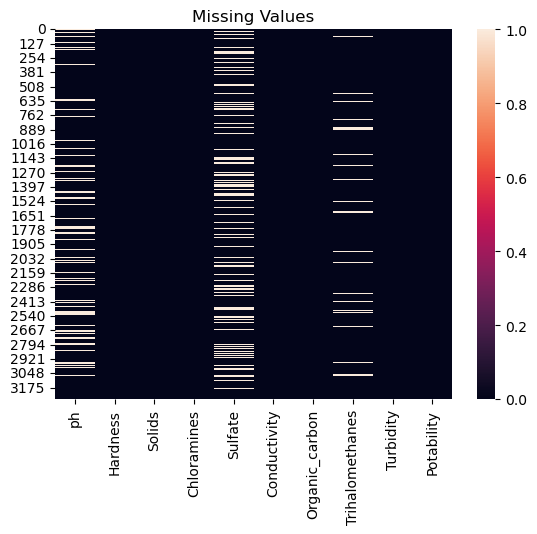

In [10]:
#Visualize the missing data
sns.heatmap(FelixData.isnull())
plt.title("Missing Values")

In [11]:
# checking for duplicated values
# no duplicated value 
FelixData.duplicated().sum()

0

### Data Cleaning

In [12]:
# using thr describe function to disppkace the columns with missng values
Null_columns = ['ph', 'Sulfate', 'Trihalomethanes']
FelixData[Null_columns].describe()

ph      Sulfate  Trihalomethanes
count  2785.000000  2495.000000      3114.000000
mean      7.080795   333.775777        66.396293
std       1.594320    41.416840        16.175008
min       0.000000   129.000000         0.738000
25%       6.093092   307.699498        55.844536
50%       7.036752   333.073546        66.622485
75%       8.062066   359.950170        77.337473
max      14.000000   481.030642       124.000000

In [13]:

# Filling missing data values using the function SimpleImputer from sKlearn impute library
# numerical value: using "mean" value

numImputer = SimpleImputer(missing_values=np.nan, strategy='mean')

numImputer = numImputer.fit(FelixData[['ph', 'Sulfate', 'Trihalomethanes']])

FelixData[['ph', 'Sulfate', 'Trihalomethanes']]=numImputer.transform(FelixData[['ph', 'Sulfate', 'Trihalomethanes']])

In [14]:
# viewing the missing values after filling with mean value
# all the missing values has been replaced with "mean" 
FelixData.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
FelixData.shape

(3276, 10)

In [16]:
# checking for duplicated values
# no duplicated value
FelixData.duplicated().sum()

0

In [17]:
# checking the unique value in the Target Variable(Class Label)
# data type is (interger)
FelixData.Potability.unique()

array([0, 1], dtype=int64)

In [18]:
# Value count for potability
# potability count for "0" is 1998 while potability count for "1" is 1278
# The value counts appears to be imbalanced.
FelixData['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

### Exploratory Data Analysis and Visualization

Text(0.8, 1500, 'Water Safe for drinking')

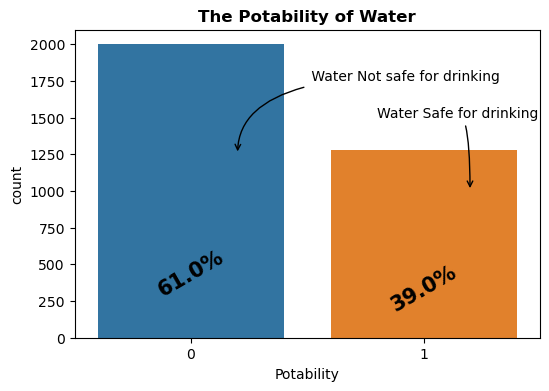

In [19]:
# visualising the Target variable to display the potabilty of water in percentage 
# Potability of water (IMBALANCE)

fig = plt.figure(figsize=(6,4))
ax=sns.countplot(data=FelixData, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(FelixData)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')

plt.title("The Potability of Water", size=12, weight='bold')
plt.annotate(text=" Water Not safe for drinking", xytext=(0.5,1750), xy=(0.2,1250), 
             arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Water Safe for drinking", xytext=(0.8,1500), xy=(1.2,1000), 
             arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')


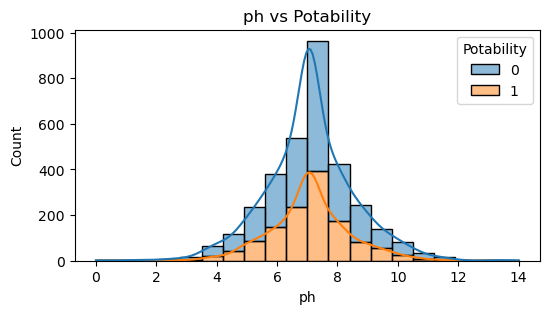

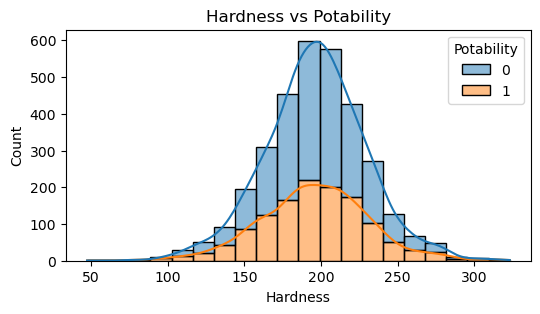

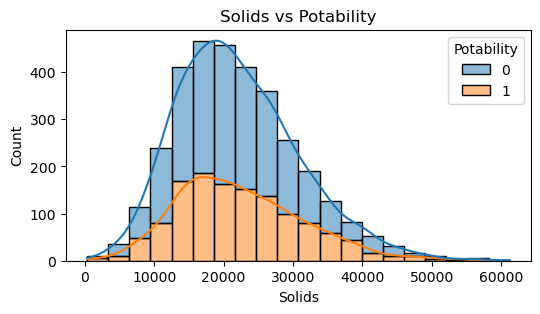

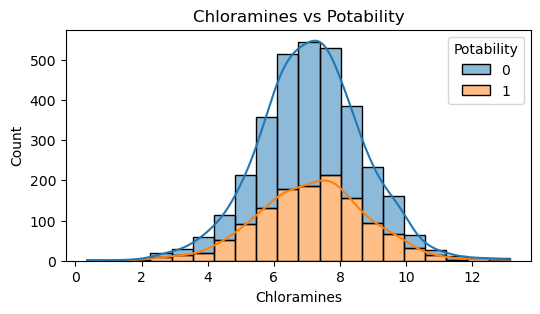

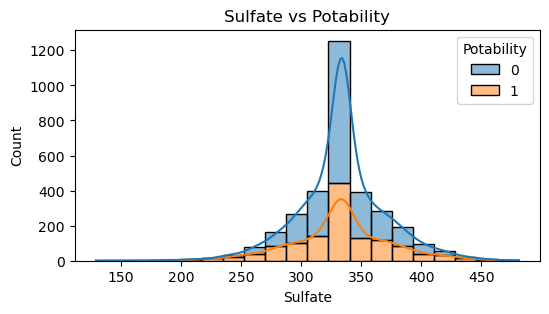

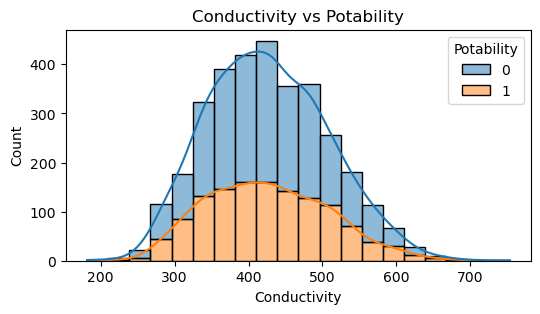

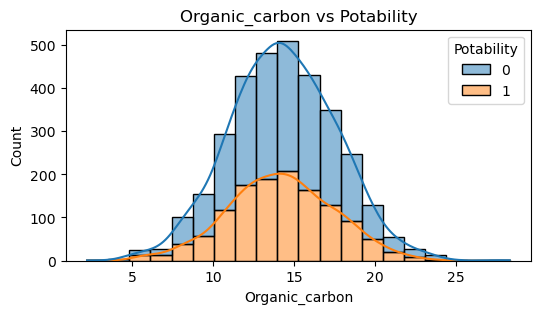

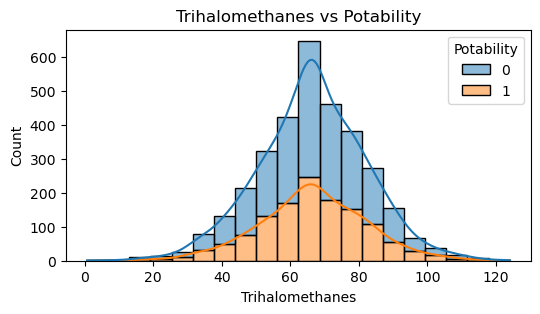

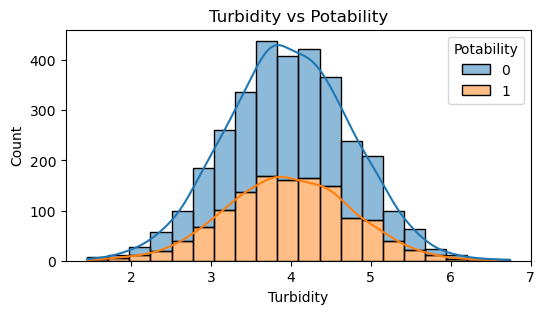

In [20]:
# visualising the distribution of the numerical value using seaborn histplot function w.r. to Potability(Target variable)

columns=FelixData.select_dtypes(exclude="object").columns
for i in range(len(columns)-1):
    
    plt.figure(figsize=(6,3))
    sns.histplot(data=FelixData, x=FelixData[columns[i]], hue="Potability", kde=True, 
                 color="red", multiple="stack", bins=20)
    plt.title(f"{columns[i]} vs Potability")
    plt.show()

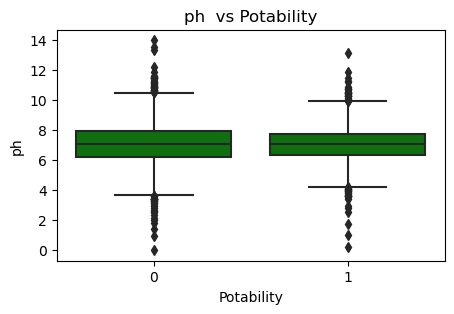

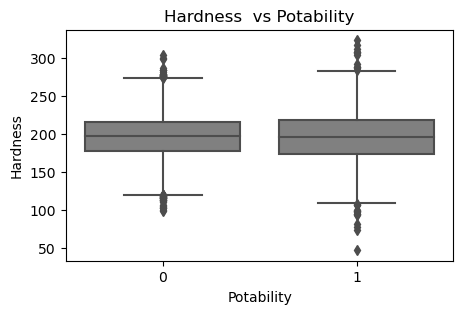

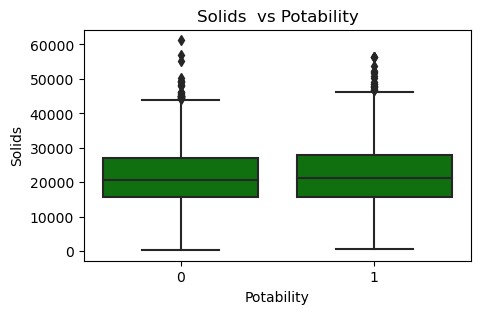

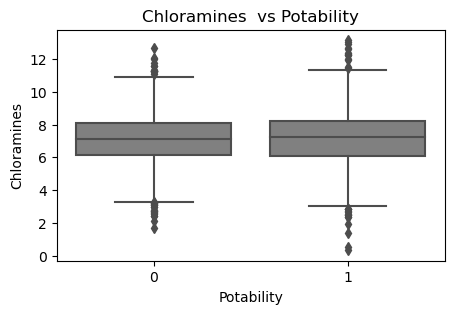

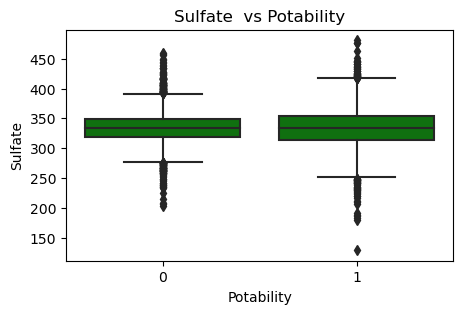

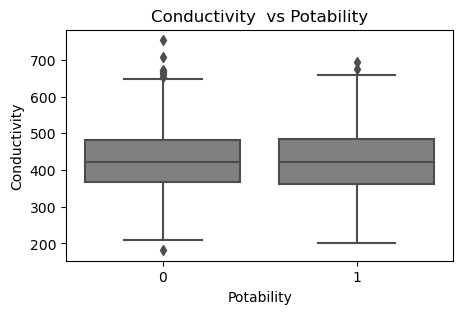

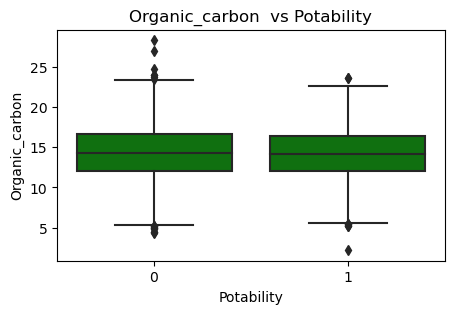

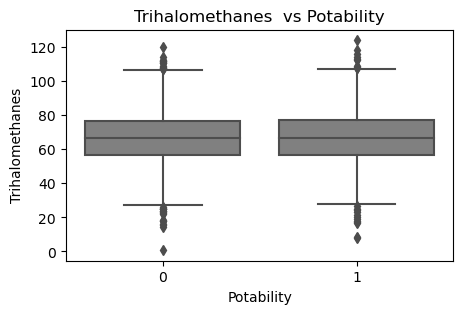

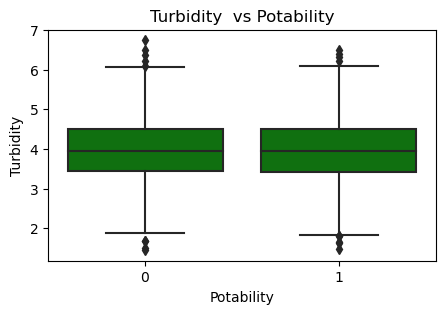

In [21]:
# checking the dataset for outliers by usingh the seaborn boxplot to visualize 
colors = ("green","grey","green","grey","green","grey","green","grey","green")

for i in  range(len(columns)-1):
    
    plt.figure(figsize=(5,3))
    sns.boxplot(FelixData, x=FelixData["Potability"], y=FelixData[columns[i]], color = colors[i])
    plt.title(f"{columns[i]}  vs Potability")
    plt.show()

In [22]:
from scipy import stats

# Removing outliers
def remove_outliers_iqr(FelixData):
    # Select only numeric columns
    numeric_columns = FelixData.select_dtypes(include=[np.number])
    
    # Calculate IQR
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Remove outliers
    cleaned_data = FelixData[~outliers]
    
    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(FelixData)
cleaned_data = cleaned_data_iqr


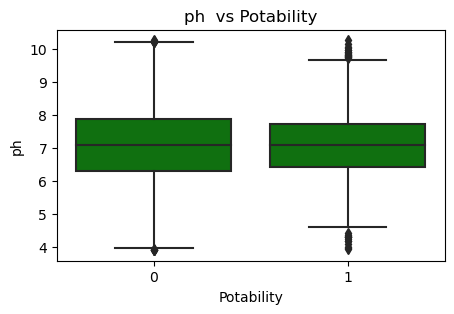

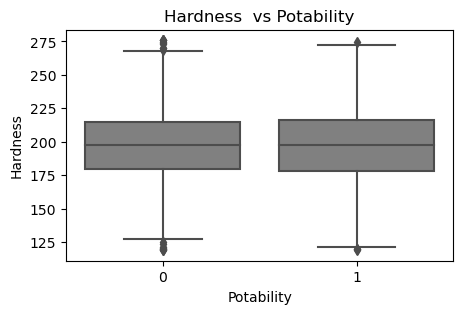

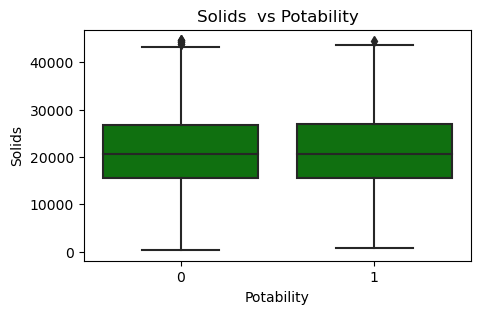

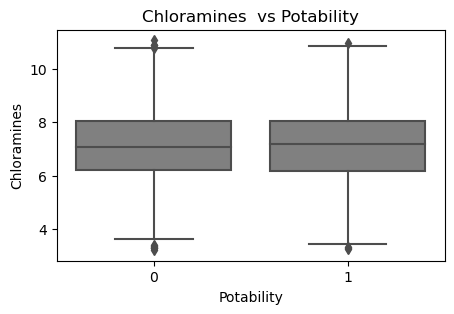

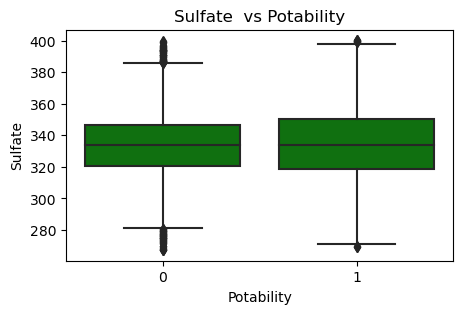

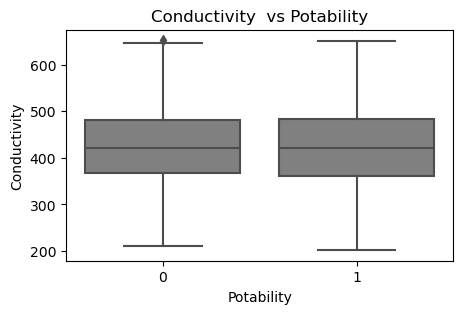

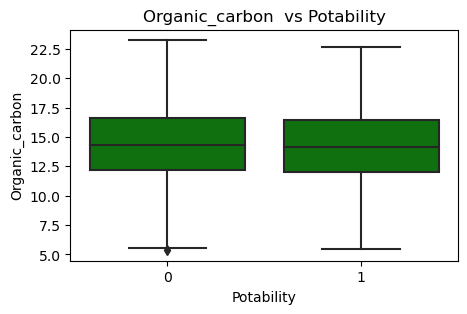

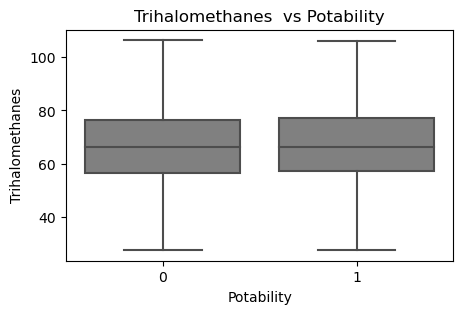

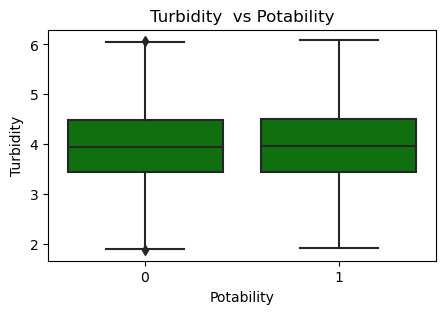

In [23]:
# checking the dataset for outliers by usingh the seaborn boxplot to visualize 
colors = ("green","grey","green","grey","green","grey","green","grey","green")

for i in  range(len(columns)-1):
    
    plt.figure(figsize=(5,3))
    sns.boxplot(FelixData, x=cleaned_data["Potability"], y=cleaned_data[columns[i]], color = colors[i])
    plt.title(f"{columns[i]}  vs Potability")
    plt.show()

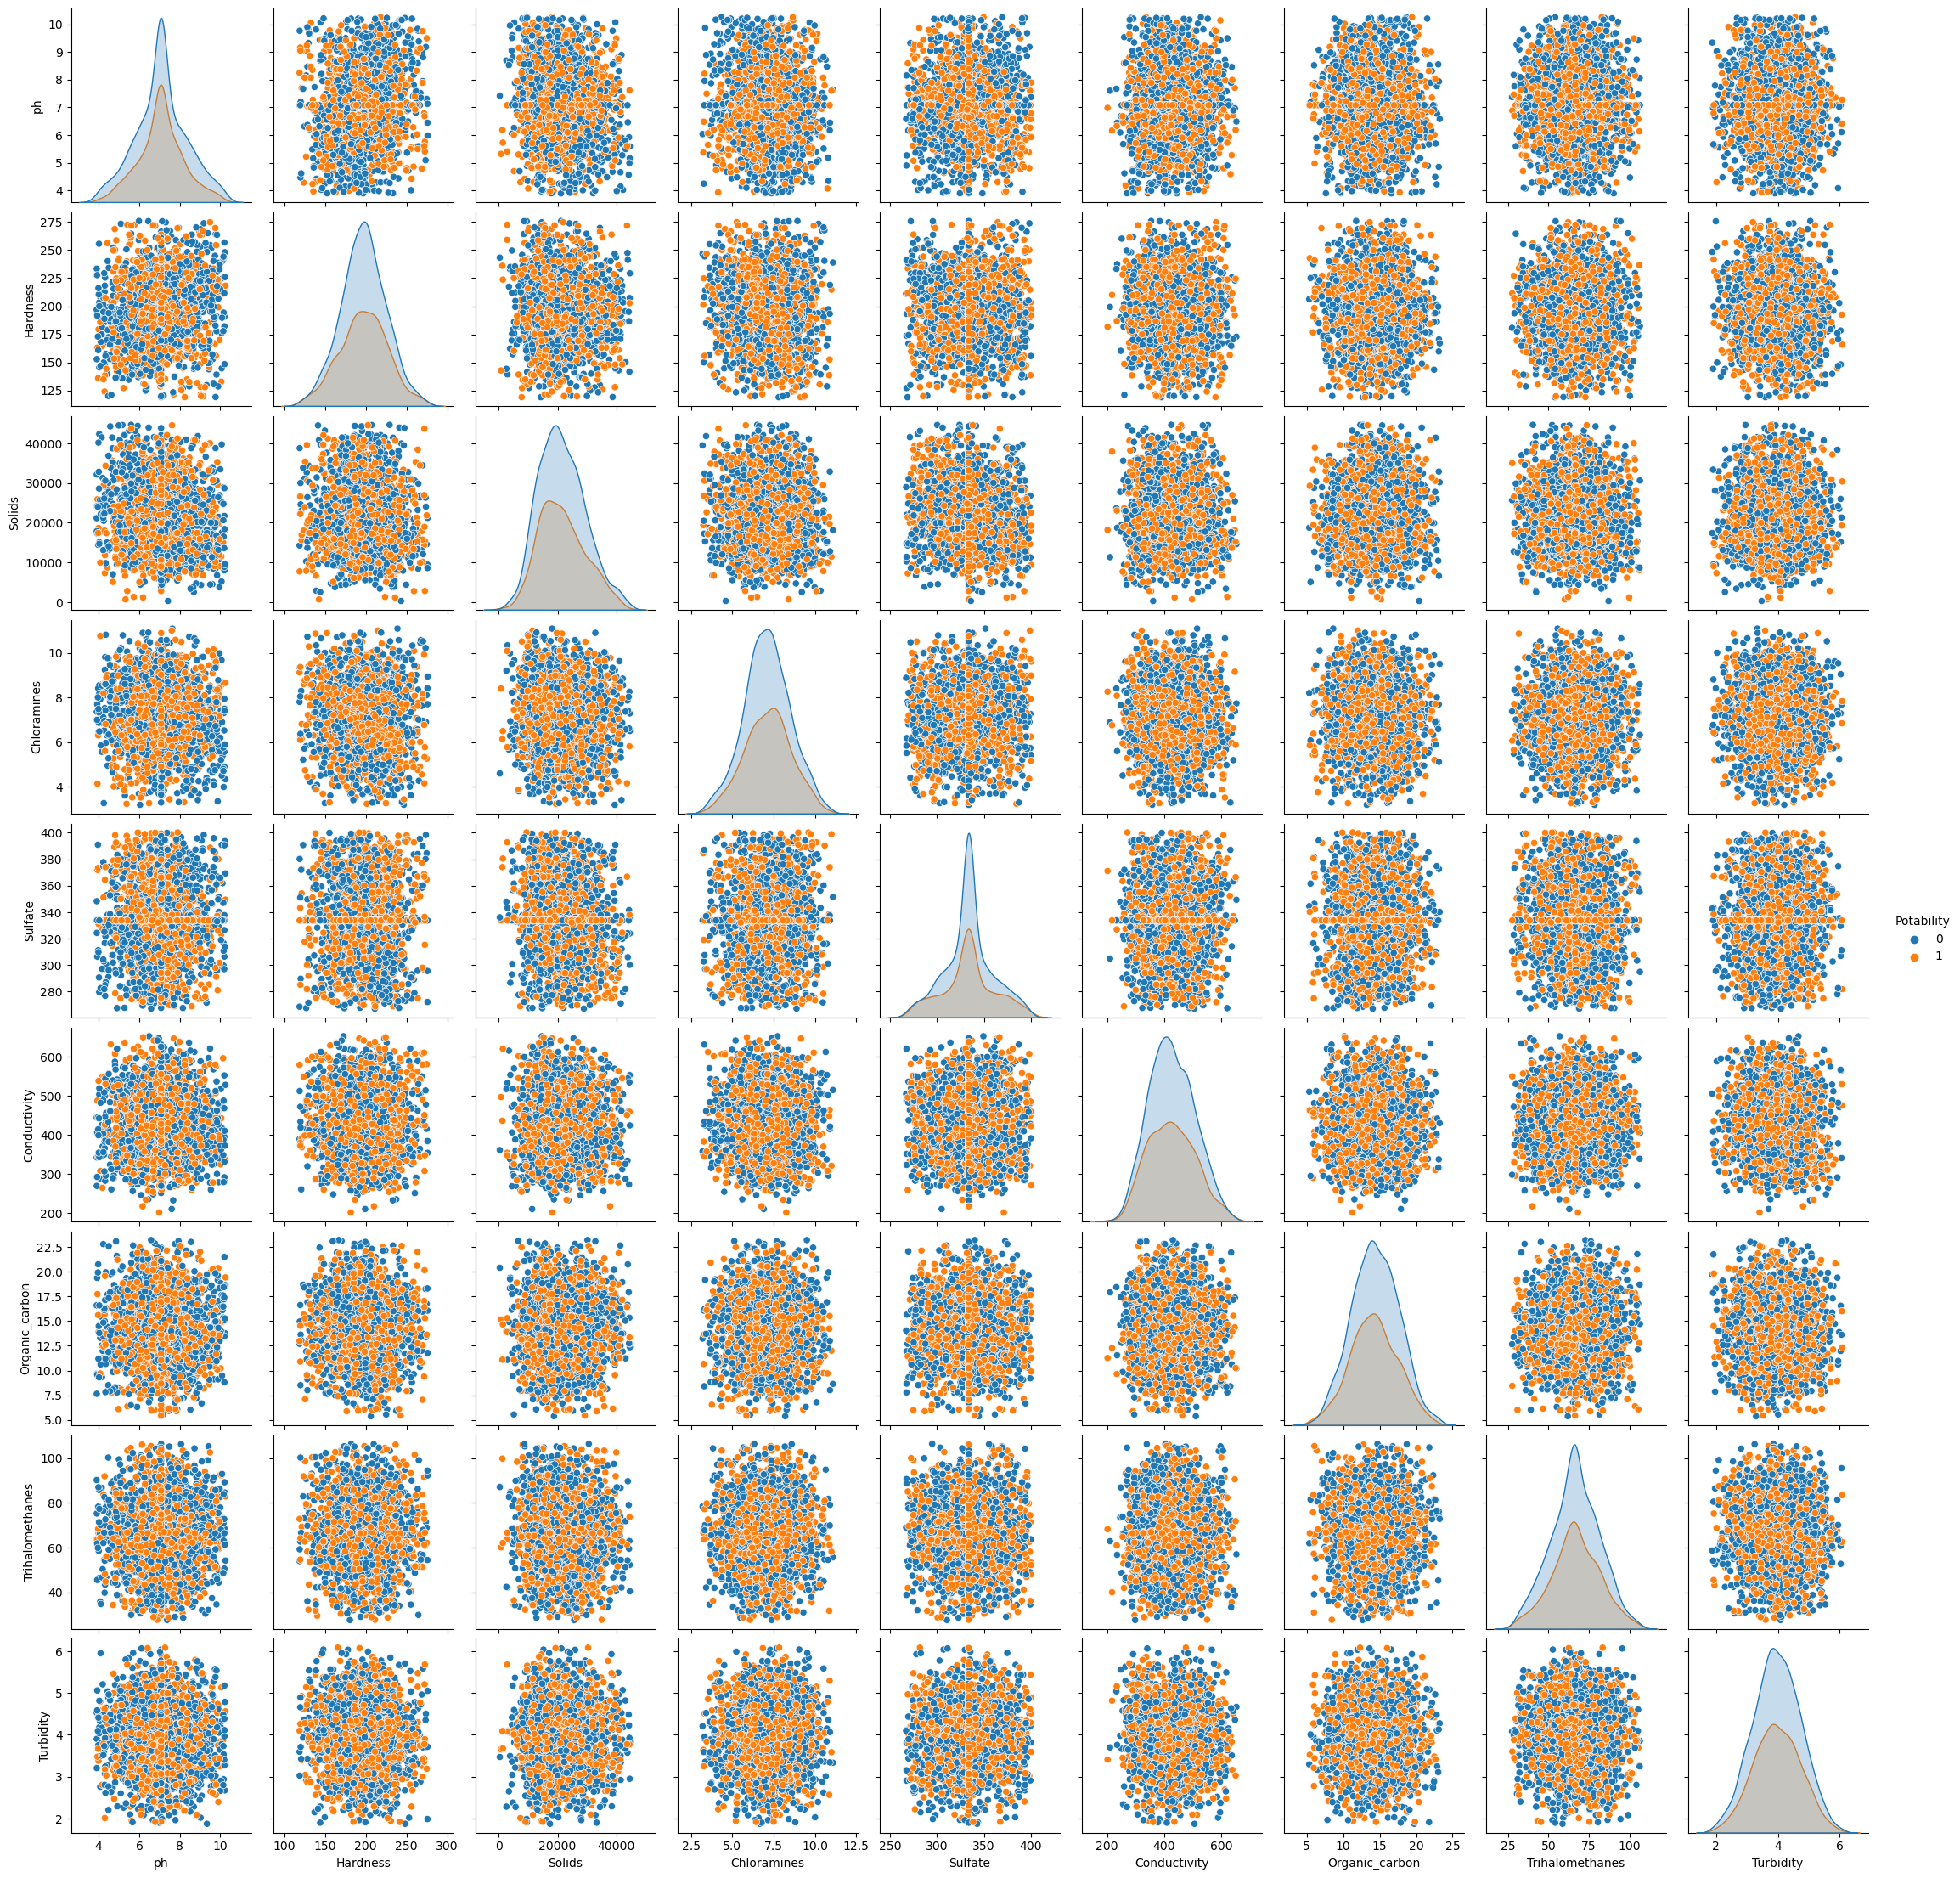

In [24]:
sns.pairplot(data=cleaned_data,hue='Potability')


In [25]:
# Lets make the correlation matrix
cleaned_data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.131362 -0.087036    -0.062888  0.016894   
Hardness         0.131362  1.000000 -0.045552    -0.035832 -0.027939   
Solids          -0.087036 -0.045552  1.000000    -0.040392 -0.110090   
Chloramines     -0.062888 -0.035832 -0.040392     1.000000  0.024502   
Sulfate          0.016894 -0.027939 -0.110090     0.024502  1.000000   
Conductivity     0.001943 -0.030415  0.007087    -0.015277 -0.005850   
Organic_carbon   0.026160  0.012463  0.026793    -0.000684 -0.007588   
Trihalomethanes  0.009172 -0.007093 -0.024550     0.016574 -0.022269   
Turbidity       -0.043034 -0.022362  0.022801    -0.005415 -0.017310   
Potability      -0.005949 -0.000710  0.005600     0.013195 -0.003741   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.001943        0.026160         0.009172  -0.043034   
Hardness            -0.030415        0.012463        -0.007093  -0.022362   
Solids               0.007087        0.026793        -0.024550   0.022801   
Chloramines         -0.015277       -0.000684         0.016574  -0.005415   
Sulfate             -0.005850       -0.007588        -0.022269  -0.017310   
Conductivity         1.000000        0.006515        -0.001138   0.007674   
Organic_carbon       0.006515        1.000000        -0.000059  -0.016705   
Trihalomethanes     -0.001138       -0.000059         1.000000  -0.024269   
Turbidity            0.007674       -0.016705        -0.024269   1.000000   
Potability          -0.001886       -0.027090         0.014351   0.004761   

                 Potability  
ph                -0.005949  
Hardness          -0.000710  
Solids             0.005600  
Chloramines        0.013195  
Sulfate           -0.003741  
Conductivity      -0.001886  
Organic_carbon    -0.027090  
Trihalomethanes    0.014351  
Turbidity          0.004761  
Potability         1.000000

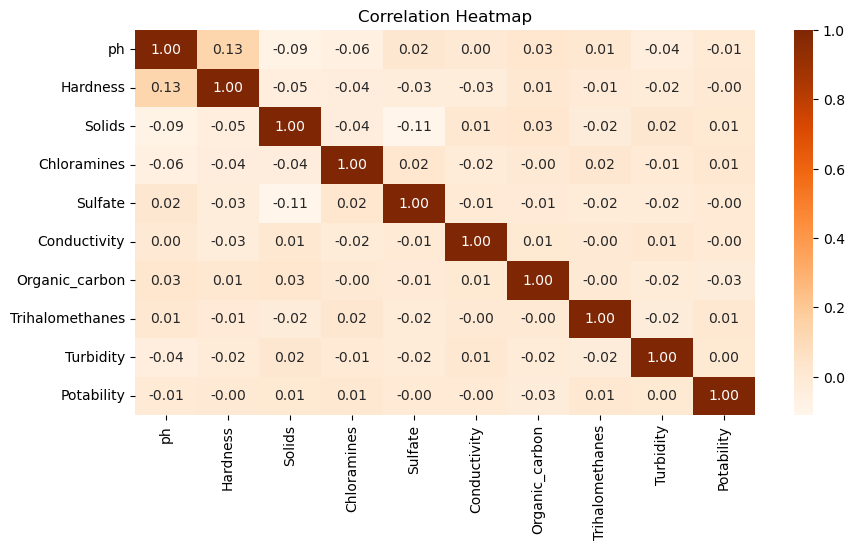

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(cleaned_data.corr(), annot=True, cmap="Oranges", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Classification Model Implementation and Evaluation:

#### 1. RandomForestClassifier Model

In [27]:
# Value count of target variable after the removal of outliers
cleaned_data['Potability'].value_counts()

Potability
0    1671
1     995
Name: count, dtype: int64

In [28]:
# Balancing the target value 

not_potable = cleaned_data[cleaned_data['Potability']==0]   
potable = cleaned_data[cleaned_data['Potability']==1]  

Resampled_potability = resample(potable, replace = True, n_samples = 1671) 
FelixData_Resampled = pd.concat([not_potable, Resampled_potability])

FelixData_Resampled = shuffle(FelixData_Resampled)

FelixData_Resampled.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
1705  5.588130  220.817522   8730.312436     8.321897  300.220428   
776   7.080795  155.864382  28224.774178     8.366723  392.582582   
164   7.080795  202.254833  11981.740191     9.189106  339.983935   
2617  7.509350  192.467955  17045.600095     8.815845  346.741822   
893   9.055826  196.475899  20226.287945     5.838594  298.803560   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1705    412.708557        6.478626        80.637806   3.165618           0  
776     421.343736       18.778696        52.640594   4.930190           1  
164     416.588906       14.079228        62.765530   2.678911           0  
2617    266.357744       15.930051        83.262529   4.321856           0  
893     342.359411       12.813634        84.279218   5.456913           0

In [29]:
# value count after balancing

FelixData_Resampled['Potability'].value_counts()

Potability
0    1671
1    1671
Name: count, dtype: int64

In [30]:
# No missing value after cleaning and balancing 
FelixData_Resampled.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Text(0.8, 1500, 'Safe for drinking')

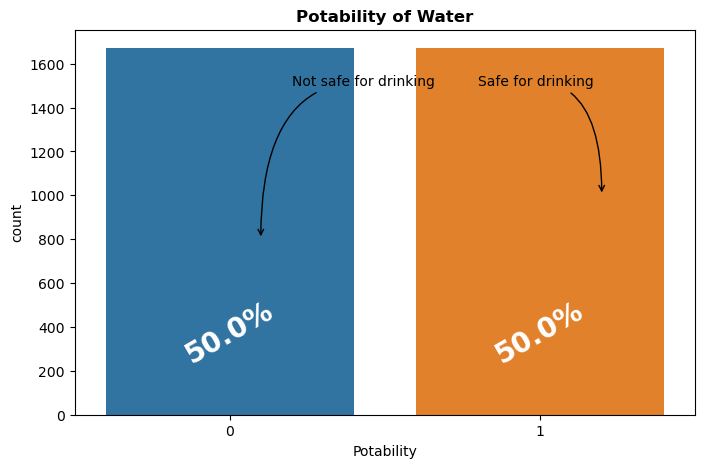

In [31]:
# countplot to visualize the target variable after balancing 
fig = plt.figure(figsize=(8,5))
ax=sns.countplot(data=FelixData_Resampled, x='Potability')

for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(FelixData_Resampled)*100,0)}%", 
            ha='center', size=20, weight='bold', rotation=30, color='white')

plt.title("Potability of Water", size=12, weight='bold')
plt.annotate(text="Not safe for drinking", xytext=(0.2,1500),xy=(0.1,800), 
             arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for drinking", xytext=(0.8,1500),xy=(1.2,1000), 
             arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')



In [32]:
# Assigning test and train data to a new variable
X = FelixData_Resampled.drop(["Potability"], axis=1)
y = FelixData_Resampled["Potability"]


In [33]:
# (b) Splitting the dataset into the trainning set and the Test set:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [34]:
# Using VarianceThreshold to remove low or no variance features

variance_selector = VarianceThreshold(threshold=0)

X_train_fs = variance_selector.fit_transform(X_train) 
X_test_fs = variance_selector.transform(X_test)

In [35]:
# Apparently no features was removed. 
# this implies that all the column variables are needed to create a good model

print(f"""{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain""")

0 features have been removed, 9 features remain


In [36]:
rf = RandomForestClassifier(random_state=0) # Use RandomForestClassifier as the base model

rfecv = RFECV(rf, cv=3, step=5)

X_train_fs = rfecv.fit_transform(X_train_fs, y_train) 
X_test_fs = rfecv.transform(X_test_fs)

print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 9


In [37]:
rf_selectedfeatures = RandomForestClassifier() 
rf_selectedfeatures.fit(X_train_fs, y_train)

RandomForestClassifier()

In [38]:
# Make predictions on the test data
y_pred = rf_selectedfeatures.predict(X_test_fs)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%") 



Accuracy Score: 83.56%


In [39]:
cm = metrics.confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')

print(cm,'\n\n')

print('-----------------------------------------------------')

result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)




Confusion Matrix:
[[286  47]
 [ 63 273]] 


-----------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       333
           1       0.85      0.81      0.83       336

    accuracy                           0.84       669
   macro avg       0.84      0.84      0.84       669
weighted avg       0.84      0.84      0.84       669



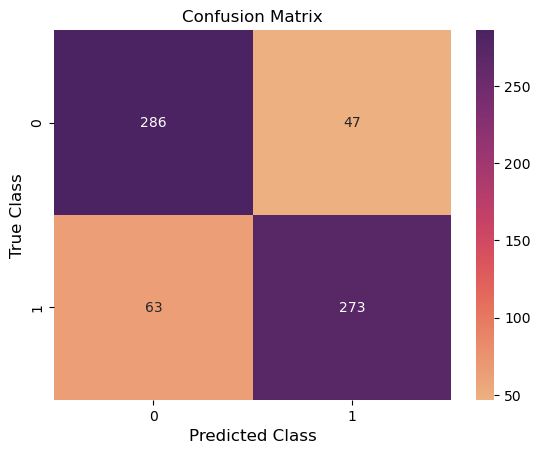

In [40]:
cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12)

plt.show()